In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
chatelet_df = pd.read_csv('/home/hala/Downloads/qualite-de-lair-mesuree-dans-la-station-chatelet.csv', sep = ';', parse_dates = True)
auber_df = pd.read_csv('/home/hala/Downloads/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv', sep = ';', parse_dates = True)
#roosevelt_df = pd.read_csv('roosevelt.csv', sep = ';', parse_dates = True)


In [ ]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,ND,ND,43,508,"18,2","49,1"
1,2022-10-10T01:00:00+02:00,ND,ND,45,529,"18,5","48,4"
2,2022-10-10T00:00:00+02:00,ND,ND,42,547,"18,8","47,1"
3,2022-10-09T23:00:00+02:00,ND,ND,59,614,"19,1","47,2"
4,2022-10-09T22:00:00+02:00,ND,ND,65,637,"19,4","46,3"
...,...,...,...,...,...,...,...
85432,2013-01-01T06:00:00+01:00,4,26,102,622,"21,2","45,9"
85433,2013-01-01T05:00:00+01:00,3,25,85,715,"21,6","45,8"
85434,2013-01-01T04:00:00+01:00,4,27,124,799,"21,8",47
85435,2013-01-01T03:00:00+01:00,6,30,166,800,"21,6","47,3"


In [ ]:
roosevelt_df

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,33,58,58,522,"21,3",44
1,2022-10-10T01:00:00+02:00,53,63,48,540,"21,5","43,3"
2,2022-10-10T00:00:00+02:00,31,62,39,551,"21,6","42,6"
3,2022-10-09T23:00:00+02:00,21,63,31,542,21,"44,7"
4,2022-10-09T22:00:00+02:00,10,48,30,532,"20,8","45,2"
...,...,...,...,...,...,...,...
85432,2013-01-01T06:00:00+01:00,27,57,15,464,15,"63,3"
85433,2013-01-01T05:00:00+01:00,27,56,22,481,"14,9","63,7"
85434,2013-01-01T04:00:00+01:00,22,52,45,490,"14,9","63,3"
85435,2013-01-01T03:00:00+01:00,43,61,18,536,"14,9",65


In [ ]:
auber_df

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,28,56,103,35,509,"21,7","43,7"
1,2022-10-10T01:00:00+02:00,29,58,108,41,518,"21,8","43,1"
2,2022-10-10T00:00:00+02:00,28,58,140,52,533,22,"42,9"
3,2022-10-09T23:00:00+02:00,27,57,113,41,570,"22,1","43,1"
4,2022-10-09T22:00:00+02:00,15,53,138,49,588,"22,4","42,2"
...,...,...,...,...,...,...,...,...
84539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Questions
Here is a list of relevant questions that can be tackled by analyzing the published data. feel free to ask more
questions or reformulate these ones.
. Predict CO2 level in a selected station from time of day, past values, temperature and humidity.
. Predict NO/NO2/PM10 levels (+PM25 for Auber) in a selected station from past values, temperature
and humidity. Does it help to also consider current CO2 level?
. Compare models for each stations.
. Can current levels in two stations help predict levels in third station?
. Can surface air quality data help predict NO/NO2/PM10/PM25 levels in subway stations?

In [ ]:
#chatelet_df['DATE/HEURE'] = chatelet_df['DATE/HEURE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f%z').astimezone(ZoneInfo('Europe/Paris')).strftime('%I:%M %p'))

In [ ]:
#datetime.strptime('2022-02-18T00:00:00.000Z', '%Y-%m-%dT%H:%M:%S.%f%z').astimezone(ZoneInfo('America/New_York')).strftime('%I:%M %p')

In [ ]:
chatelet_df.set_index('DATE/HEURE', inplace = True)

In [ ]:
chatelet_df = chatelet_df.apply(lambda x: x.replace('ND',np.NaN))
# auber_df = auber_df.apply(lambda x: x.replace('ND',np.NaN))
# roosevelt_df = roosevelt_df.apply(lambda x: x.replace('ND',np.NaN))

In [ ]:
auber_df.dropna(axis = 0, how = 'all', inplace = True)

In [ ]:
roosevelt_df.dropna(axis = 0, how = 'all', inplace = True)

In [ ]:
auber_df.set_index('DATE/HEURE', inplace = True)


In [ ]:
roosevelt_df.set_index('date/heure', inplace = True)


In [ ]:
auber_df.columns

Index(['NO', 'NO2', 'PM10', 'PM2.5', 'CO2', 'TEMP', 'HUMI'], dtype='object')

In [ ]:
roosevelt_df.columns

Index(['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI'], dtype='object')

In [ ]:
chatelet_df.isna().sum()

NO      28296
NO2     19504
PM10    15330
CO2     15722
TEMP    10712
HUMI    10711
dtype: int64

<AxesSubplot:ylabel='DATE/HEURE'>

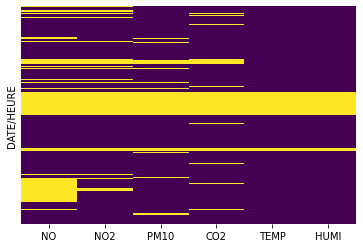

In [ ]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
chatelet_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot:ylabel='DATE/HEURE'>

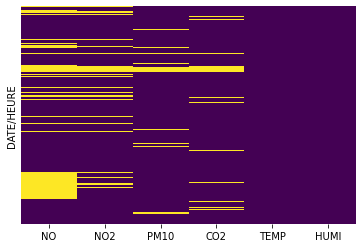

In [ ]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

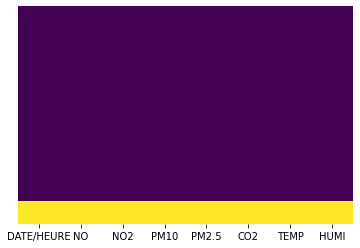

In [ ]:
sns.heatmap(auber_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:ylabel='date/heure'>

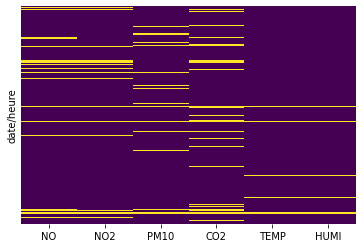

In [ ]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
roosevelt_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot:ylabel='date/heure'>

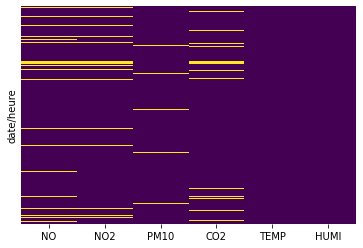

In [ ]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
chatelet_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot:ylabel='DATE/HEURE'>

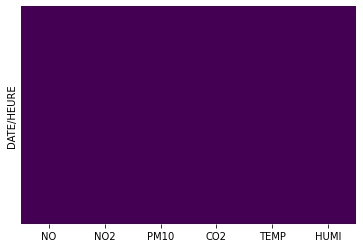

In [ ]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
auber_df.fillna(method = 'bfill', inplace = True)

In [ ]:
roosevelt_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot:ylabel='date/heure'>

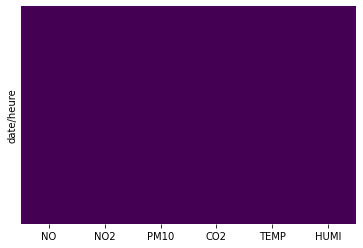

In [ ]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
chatelet_df.dtypes

NO      object
NO2     object
PM10    object
CO2     object
TEMP    object
HUMI    object
dtype: object

In [ ]:
chatelet_df['HUMI'] = chatelet_df['HUMI'].apply(lambda x: x.replace(',','.'))
chatelet_df['TEMP'] = chatelet_df['TEMP'].apply(lambda x: x.replace(',','.'))

In [ ]:
chatelet_df['TEMP'] = chatelet_df['TEMP'].astype(float)
chatelet_df['HUMI'] = chatelet_df['HUMI'].astype(float)


In [ ]:
chatelet_df['NO2'] = chatelet_df['NO2'].apply(lambda x: x.replace('<',''))

In [ ]:
chatelet_df['NO2'] = chatelet_df['NO2'].astype(float)


In [ ]:
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('>',''))
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('<',''))

In [ ]:
chatelet_df['PM10'] = chatelet_df['PM10'].astype(float)


In [ ]:
chatelet_df['CO2'] = chatelet_df['CO2'].astype(float)


In [ ]:
chatelet_df['NO'] = chatelet_df['NO'].apply(lambda x: x.replace('<',''))

In [ ]:
chatelet_df['NO'] = chatelet_df['NO'].astype(float)


In [ ]:
chatelet_df

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE/HEURE,,,,,,
2022-10-10T02:00:00+02:00,5.0,7.0,43.0,508.0,18.2,49.1
2022-10-10T01:00:00+02:00,5.0,7.0,45.0,529.0,18.5,48.4
2022-10-10T00:00:00+02:00,5.0,7.0,42.0,547.0,18.8,47.1
2022-10-09T23:00:00+02:00,5.0,7.0,59.0,614.0,19.1,47.2
2022-10-09T22:00:00+02:00,5.0,7.0,65.0,637.0,19.4,46.3
...,...,...,...,...,...,...
2013-01-01T06:00:00+01:00,4.0,26.0,102.0,622.0,21.2,45.9
2013-01-01T05:00:00+01:00,3.0,25.0,85.0,715.0,21.6,45.8
2013-01-01T04:00:00+01:00,4.0,27.0,124.0,799.0,21.8,47.0


In [ ]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

In [ ]:
auber_df.index = pd.to_datetime(auber_df.index, utc = True)


In [ ]:
chatelet_df.index = pd.to_datetime(chatelet_df.index, utc = True)


In [ ]:
roosevelt_df.index = pd.to_datetime(roosevelt_df.index, utc = True)

In [ ]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

In [ ]:
chatelet_df = chatelet_df.reset_index()
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3
...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3


In [ ]:
chatelet_df['date'] = pd.to_datetime(chatelet_df['DATE/HEURE'], errors='coerce').dt.date
chatelet_df['time'] = pd.to_datetime(chatelet_df['DATE/HEURE'], errors='coerce').dt.time

In [ ]:
chatelet_df.dtypes

DATE/HEURE    datetime64[ns, UTC]
NO                        float64
NO2                       float64
PM10                      float64
CO2                       float64
TEMP                      float64
HUMI                      float64
date                       object
time                       object
year                        int64
dtype: object

In [ ]:
chatelet_df['year'] = pd.to_datetime(chatelet_df['date']).dt.year

In [ ]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1,2022-10-10,00:00:00,2022
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4,2022-10-09,23:00:00,2022
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1,2022-10-09,22:00:00,2022
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2,2022-10-09,21:00:00,2022
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3,2022-10-09,20:00:00,2022
...,...,...,...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,2013-01-01,05:00:00,2013
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,2013-01-01,04:00:00,2013
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,2013-01-01,03:00:00,2013
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2013-01-01,02:00:00,2013


In [ ]:
chatelet_df.groupby(['year']).count()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time
year,,,,,,,,,
2013,8699,8699,8699,8699,8699,8699,8699,8699,8699
2014,8747,8747,8747,8747,8747,8747,8747,8747,8747
2015,8620,8620,8620,8620,8620,8620,8620,8620,8620
2016,7410,7410,7410,7410,7410,7410,7410,7410,7410
2017,7837,7837,7837,7837,7837,7837,7837,7837,7837
2018,945,945,945,945,945,945,945,945,945
2019,8672,8672,8672,8672,8672,8672,8672,8672,8672
2020,8777,8777,8777,8777,8777,8777,8777,8777,8777
2021,8550,8550,8550,8550,8550,8550,8550,8550,8550


In [ ]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year,hour
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1,2022-10-10,00:00:00,2022,0
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4,2022-10-09,23:00:00,2022,23
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1,2022-10-09,22:00:00,2022,22
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2,2022-10-09,21:00:00,2022,21
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3,2022-10-09,20:00:00,2022,20
...,...,...,...,...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,2013-01-01,05:00:00,2013,5
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,2013-01-01,04:00:00,2013,4
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,2013-01-01,03:00:00,2013,3
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2013-01-01,02:00:00,2013,2


In [ ]:
grouped_df=chatelet_df[chatelet_df['year'] < 2016]

In [ ]:
grouped_df=grouped_df[grouped_df['year'] > 2013]

In [ ]:
grouped_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year,hour
48884,2015-12-31 23:00:00+00:00,32.0,37.0,139.0,649.0,23.1,36.1,2015-12-31,23:00:00,2015,23
48885,2015-12-31 22:00:00+00:00,30.0,33.0,137.0,639.0,23.0,36.2,2015-12-31,22:00:00,2015,22
48886,2015-12-31 21:00:00+00:00,33.0,41.0,147.0,633.0,23.1,35.2,2015-12-31,21:00:00,2015,21
48887,2015-12-31 20:00:00+00:00,45.0,41.0,176.0,676.0,23.1,35.9,2015-12-31,20:00:00,2015,20
48888,2015-12-31 19:00:00+00:00,50.0,44.0,191.0,724.0,23.1,36.5,2015-12-31,19:00:00,2015,19
...,...,...,...,...,...,...,...,...,...,...,...
66246,2014-01-01 04:00:00+00:00,4.0,29.0,71.0,664.0,19.8,45.3,2014-01-01,04:00:00,2014,4
66247,2014-01-01 03:00:00+00:00,4.0,28.0,81.0,775.0,20.1,46.5,2014-01-01,03:00:00,2014,3
66248,2014-01-01 02:00:00+00:00,4.0,28.0,89.0,738.0,20.0,46.9,2014-01-01,02:00:00,2014,2
66249,2014-01-01 01:00:00+00:00,4.0,29.0,101.0,635.0,19.9,46.3,2014-01-01,01:00:00,2014,1


In [ ]:
#Predicting 

<AxesSubplot:>

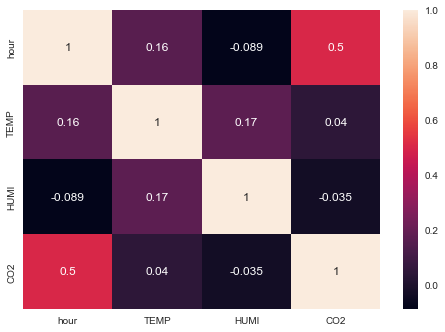

In [ ]:
sns.heatmap(grouped_df[['hour', 'TEMP', 'HUMI', 'CO2']].corr(), annot=True)

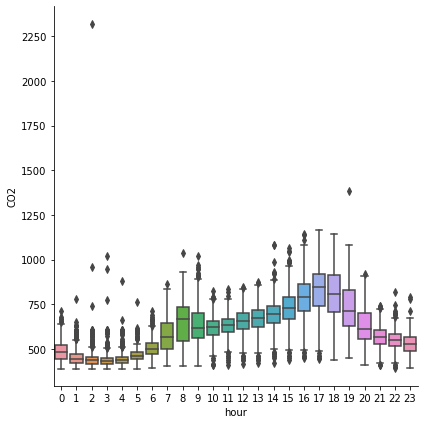

In [ ]:
ax = sns.catplot(x="hour", y="CO2", kind="box", data=grouped_df, height=6, aspect=1)

In [ ]:
grouped_df.head(2)

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year,hour
48884,2015-12-31 23:00:00+00:00,32.0,37.0,139.0,649.0,23.1,36.1,2015-12-31,23:00:00,2015,23
48885,2015-12-31 22:00:00+00:00,30.0,33.0,137.0,639.0,23.0,36.2,2015-12-31,22:00:00,2015,22


In [ ]:
X = grouped_df[['hour', 'TEMP', 'HUMI']].values
Y = grouped_df[['CO2']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([[680.0471807 ],
       [734.19979307],
       [536.332271  ],
       ...,
       [524.08416179],
       [618.4566773 ],
       [509.77293202]])

In [ ]:
test_df=chatelet_df[chatelet_df['year'] > 2016]

In [ ]:
X_test

array([[18. , 20.9, 43.2],
       [23. , 20.2, 42.7],
       [ 5. , 26.8, 58. ],
       ...,
       [ 4. , 23.6, 37.9],
       [12. , 19.8, 42.2],
       [ 3. , 26.1, 41.5]])

In [ ]:
test_df = test_df[['hour', 'TEMP', 'HUMI']]

In [ ]:
y_pred_2022=LR.predict(test_df)
y_pred_2022

C:\Users\Andreea STROIA\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[497.7235442 ],
       [740.12767956],
       [728.37994881],
       ...,
       [529.83469281],
       [519.00347581],
       [509.05179563]])

In [ ]:
! pip install yellowbrick

In [ ]:
from yellowbrick.regressor import ResidualsPlot

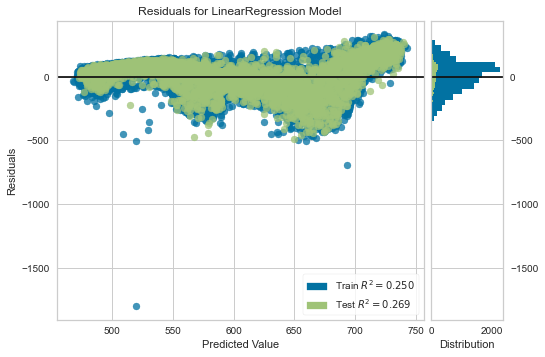

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(LR)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.26878209165336897